# Passo a Passo (Resolução do desafio): 

### Passo 1: Importar a base de dados 
### Passo 2: Visualizar a base de dados 
#####     - Entender quais as informações estão disponiveis
#####     - Descobrir os erros da base de dados 
### Passo 3: Tratamento de dados 
#####     - Valores que estão reconhecidos de forma errada
#####     - Valores vazios
### Passo 4: Analise inicial 
### Passo 5: Analise mais completa
#####     - Comparar cada coluna da minha tabela com a coluna de churn 
#####     - Criar Gráfico
#####     - Exibir Gráfico

In [1]:
#passo 1: Importar a base de dados
import pandas as pd 
tabela = pd.read_csv('telecom_users.csv')

#passo 2:Visualizar a base de dados 
tabela = tabela.drop('Unnamed: 0', axis=1)
display(tabela)

,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,...,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,SemInternet,...,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,Nao,...,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,Nao,...,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,Nao,...,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,Sim,...,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,Sim,...,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95,Sim,NaN
5982,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,Sim,...,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.3,Nao,NaN
5983,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,SemInternet,...,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao,NaN
5984,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,Nao,...,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim,NaN


In [2]:
#Passo 3: Tratamento de dados

#-valores que estão reconhecidos de forma errada
tabela['TotalGasto'] = pd.to_numeric(tabela['TotalGasto'], errors='coerce')

#-Valores vazios
#-Deletando as colunas vazias
tabela = tabela.dropna(how='all', axis=1)
#-Deletando as linhas vazias 
tabela = tabela.dropna(how='any', axis=0)
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5974 non-null   object 
 1   Genero                  5974 non-null   object 
 2   Aposentado              5974 non-null   int64  
 3   Casado                  5974 non-null   object 
 4   Dependentes             5974 non-null   object 
 5   MesesComoCliente        5974 non-null   int64  
 6   ServicoTelefone         5974 non-null   object 
 7   MultiplasLinhas         5974 non-null   object 
 8   ServicoInternet         5974 non-null   object 
 9   ServicoSegurancaOnline  5974 non-null   object 
 10  ServicoBackupOnline     5974 non-null   object 
 11  ProtecaoEquipamento     5974 non-null   object 
 12  ServicoSuporteTecnico   5974 non-null   object 
 13  ServicoStreamingTV      5974 non-null   object 
 14  ServicoFilmes           5974 non-null   

In [3]:
# Passo 4: Analise inicial 

#-Como estão os nossos cancelamentos?
print(tabela['Churn'].value_counts())
print(tabela['Churn'].value_counts(normalize=True).map('{:.1%}'.format))

Nao    4387
Sim    1587
Name: Churn, dtype: int64
Nao    73.4%
Sim    26.6%
Name: Churn, dtype: object


In [6]:
#Passo 5: Analise mais completa
#-Comparar cada coluna da minha tabela com a coluna de churn 
import plotly.express as px

#Etapa1:Criar o grafico
for coluna in tabela.columns:
    grafico = px.histogram(tabela, x=coluna, color='Churn', color_discrete_sequence=['blue','red'])
#Etapa2: Exibir o grafico 
#grafico.show()

## Abaixo estão listados os principais gráficos (Os mais visualmente relevantes) 

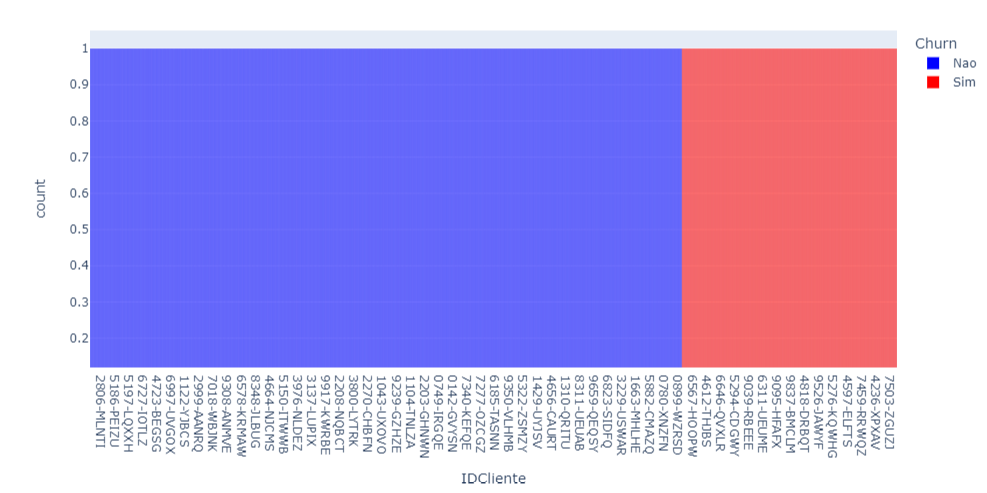

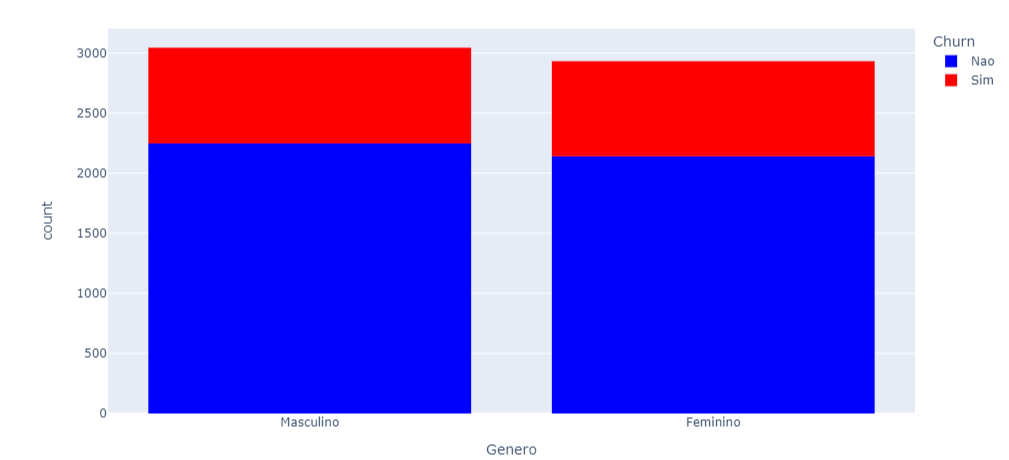

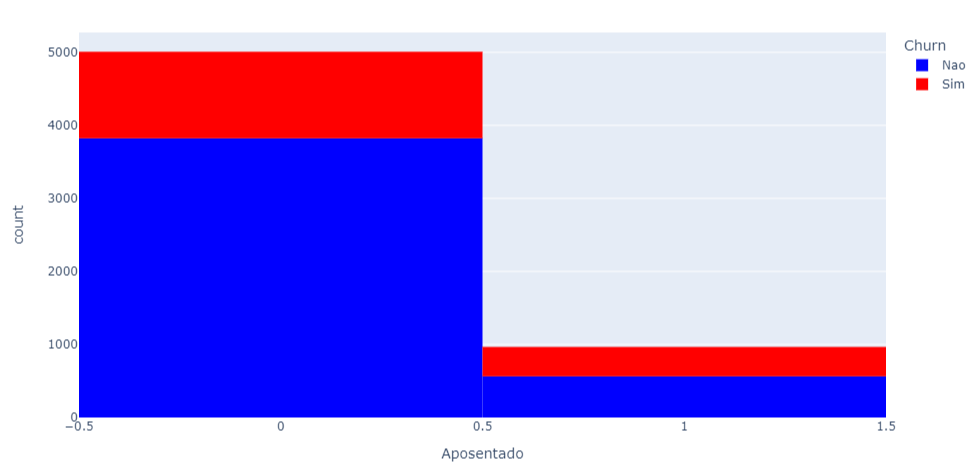

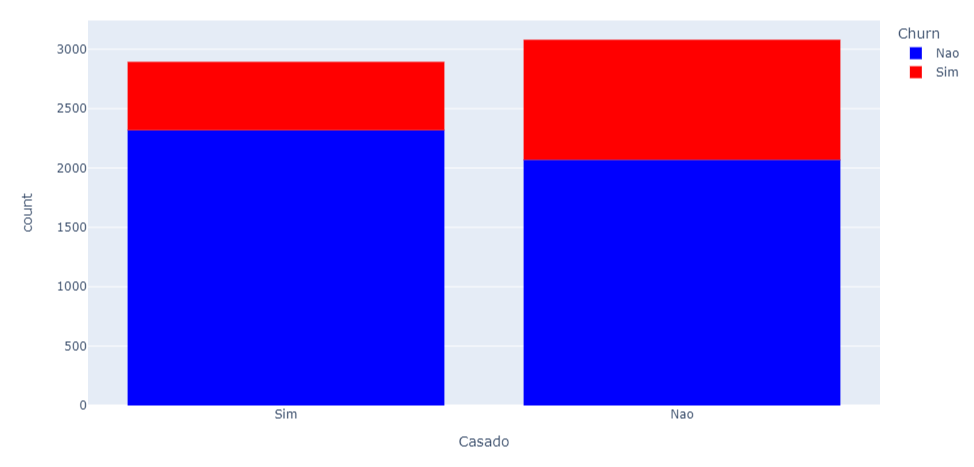

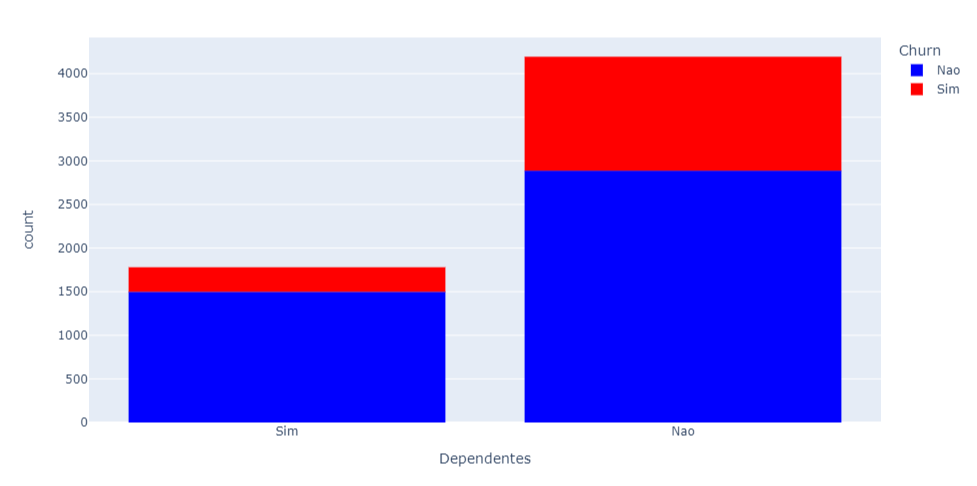

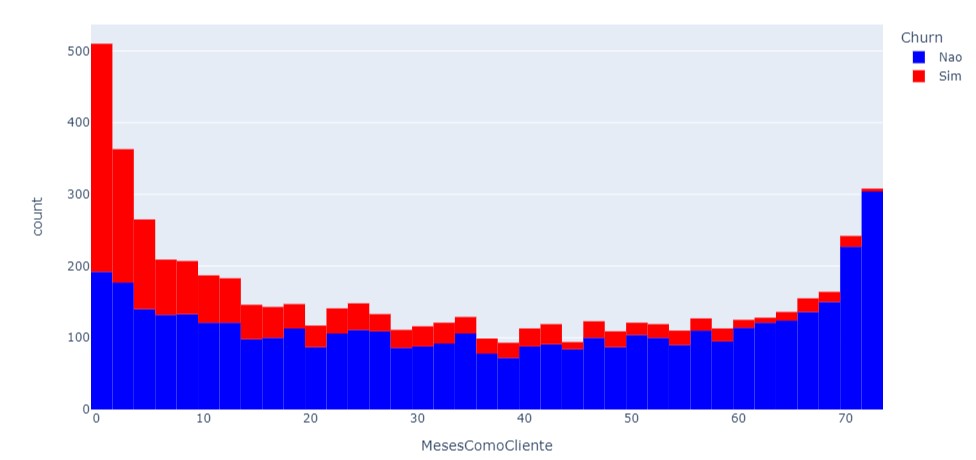

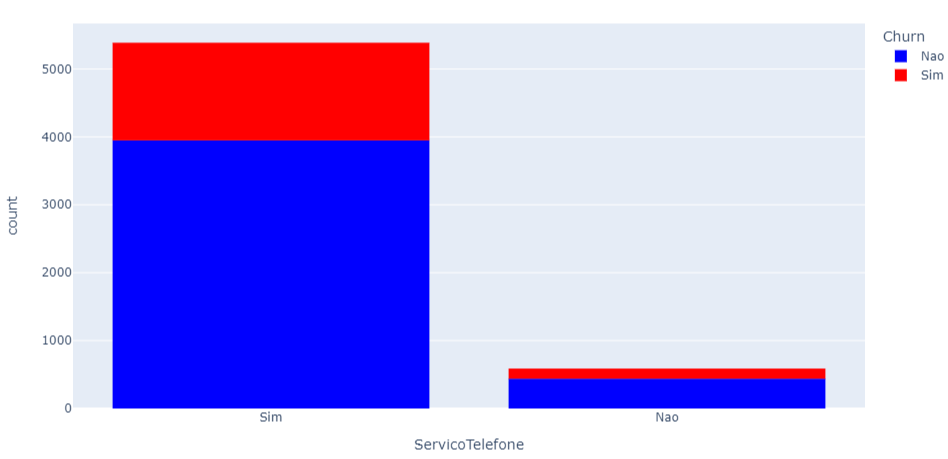

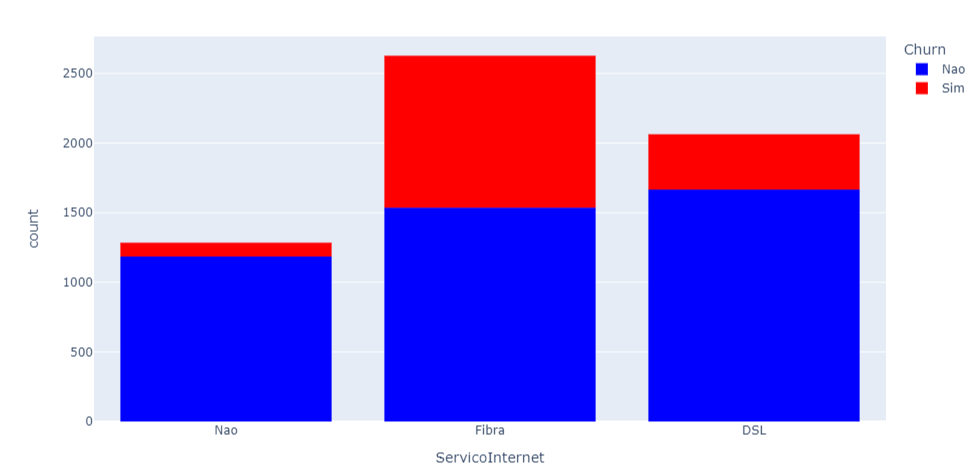

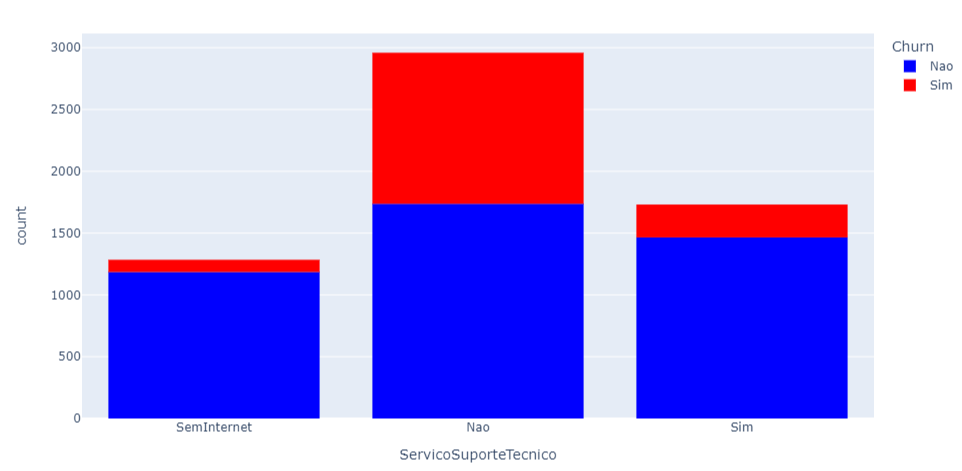

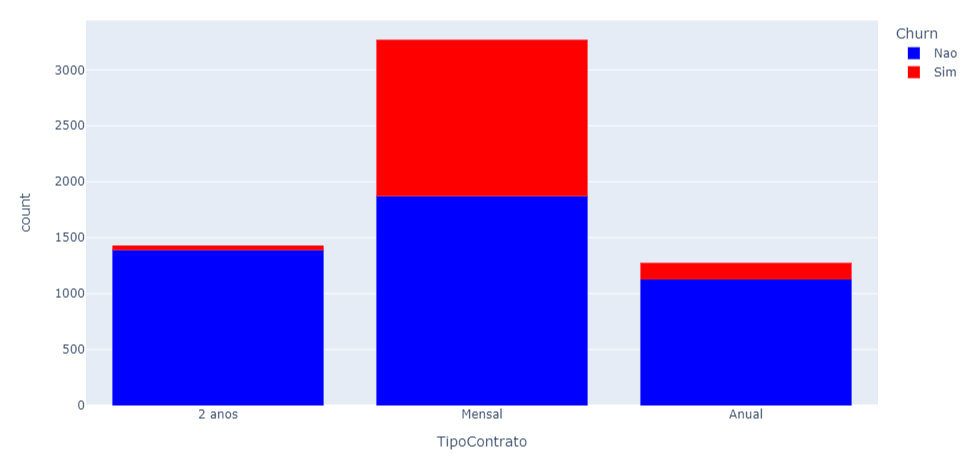

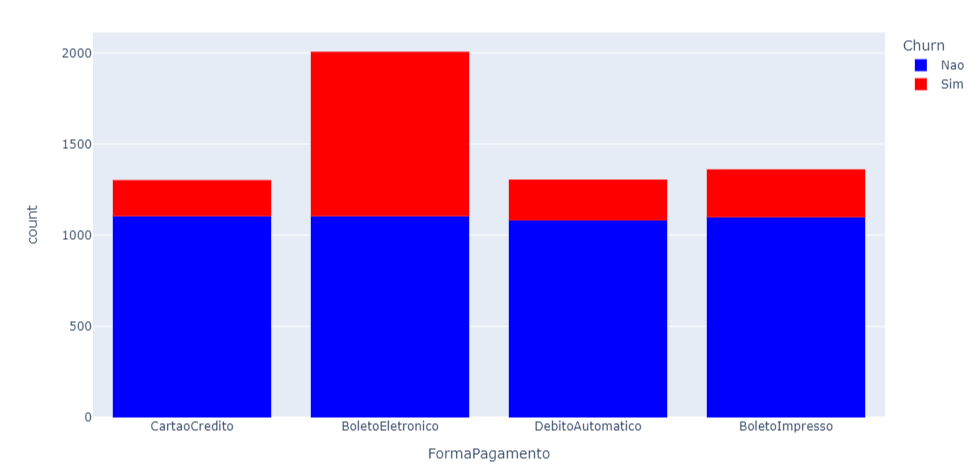

# Conclusões

- Os que possuem contrato mensal tem muito mais chance de cancelar <br>
         Ação: Podemos fazer promoções para cliente ir para o plano anual ou plano de 2 anos.
- Os que tem menos tempo como cliente tem mais chance de cancelar <br>.
    Motivo:
      1.A 1°experiencia do cliente na operadora pode ser ruim.
      2.Talvez a captação de clientes esteja trazendo clientes ruins
      Ação: talvez criar um programa de fidelização ou rever as politicas de um plano vigente 
- Clientes que tem o servico de fibra tem muito mais chance de cancelar
    Motivo:
       1.Os concorrentes estão oferecendo mais internet por menos preço?
       Ação: verificar se está ocorrendo muita queixa de problemas com fibra(conexão,velocidade) ou atendimento
- Os que não possuem os servicos de seguranca online, backup online, protecao equipamento,suporte tecnico tem mais chance de cancelar, ou seja, clientes com mais servicos cancelam menos.
       Ação: Ofertar o produto em cada atendimento. Fazer promoção.Incluir em um combo.
- Clientes com fatura digital tem muito mais chance de cancelar 
       Ação: Podemos: Avaliar o custo de enviar fatura por correio; Considerar alterar a opção de fatura digital.
- Quem paga com boleto eletronico tem muito mais chance de cancelar
       Ação: Avaliar a possibilidade de alterar forma de pagamento para cartao de crédito ou débito automático com ou sem incentivo financeiro (Ex: desconto de 10% para quem colocar a conta em debito automatico).
- Quem é casado e tem dependentes(familias maiores) tendem a cancelar menos
       Ação: Perguntar no atendimento se tem dependentes e enfatizar como os produtos no pacote podem agradar/atender as              necessidades desses dependentes; Oferecer um combo/pacote familia ou linha de telefone familia.